DNN으로 집값 예측하기 2022년 1월 6일

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
# 하이퍼 파라미터 지정
MY_HIDDEN = 1000 # 은닉층 뉴런 수 선언
MY_EPOCH = 10 # 반복 학습 수

# pandas 테이블 출력 시 생략하는 Columns 을 방지하는 옵션
pd.set_option("display.max_columns", None)

In [13]:
# 파일 읽기
data=pd.read_csv('data/housing.csv')

# 샘플 출력
print(data.head(5))
print(data.tail(5))

# 데이터 통계 출력
print(data.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741

<AxesSubplot:>

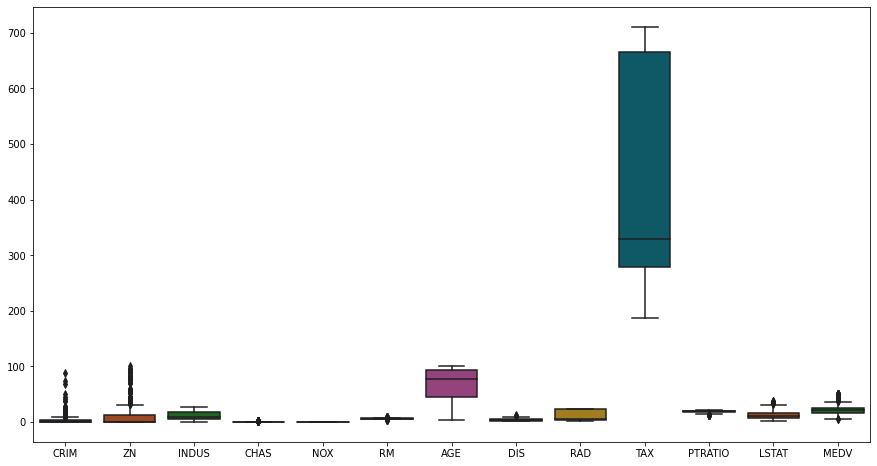

In [14]:
#상자 그림
plt.figure(figsize=(15, 8)) # 캔버스 크기
sns.boxplot(data=data, palette='dark') # 데이터, 색 설정
# 줄 맨 밑에 = 최솟값 / 박스 최하단 = 25% / 박스 가운데 선 = 50%(중앙값) / 박스 최상단 = 75% / 줄 맨 위 = 최댓값 / 바깥 점 = 이상치

<class 'pandas.core.frame.DataFrame'>
전환 전: <class 'numpy.ndarray'>
전환 후: <class 'pandas.core.frame.DataFrame'>
           0         1         2         3         4         5         6   \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.2725

<AxesSubplot:>

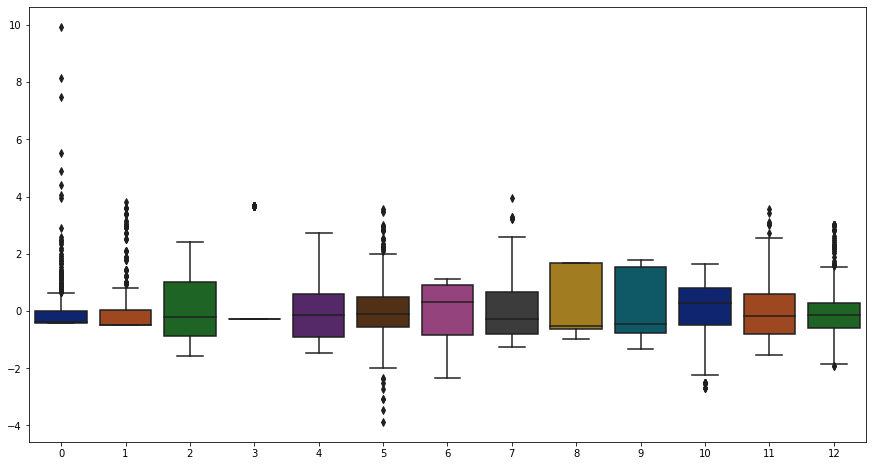

In [15]:
#데이터 정규화
scaler = StandardScaler()
z_data = scaler.fit_transform(data)
print(type(data))

#z-데이터를 numpy에서 pandas로 전환
print('전환 전:', type(z_data))
z_data = pd.DataFrame(z_data)
print('전환 후:', type(z_data))
print(z_data)
print(z_data.head(5))

# z-점수 정규화 후 통계 출력
print(z_data.describe())

#상자 그림
plt.figure(figsize=(15, 8))
sns.boxplot(data=z_data, palette='dark')

In [16]:
# 데이터 4분할
# 데이터 입력과 출력으로 분할
X_data = z_data.drop(12, axis=1)
#print(X_data)
Y_data = z_data[12]
#print(Y_data)

# 데이터를 학습용과 평가용으로 분할
# 순서 중요
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    train_size = 0.7)

#데이터 모양 출력
print("학습용 입력 모양:", X_train.shape)
print("평가용 입력 모양:", X_test.shape)
print("학습용 출력 모양:", Y_train.shape)
print("평가용 출력 모양:", Y_test.shape)

학습용 입력 모양: (354, 12)
평가용 입력 모양: (152, 12)
학습용 출력 모양: (354,)
평가용 출력 모양: (152,)


In [17]:
# 인공 신경망 구현
# Sequential 방식: 입력부터 출력으로 한층 한층 추가하는 방식
model = Sequential()

# 입력층 + 은닉층1 동시에 추가
model.add(Dense(units=MY_HIDDEN,      # 은닉층 개수 지정
                input_dim=12,         # 입력층 크기 알려줌
                activation = 'relu')) # 활성화 함수 종류

# 은닉층 2 추가
model.add(Dense(units=MY_HIDDEN,
                activation='relu'))
# 출력층 추가
model.add(Dense(units=1))

# DNN (Deep Neural Network) 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              13000     
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
# DNN 학습
# 학습 환경 설정
model.compile(optimizer='sgd', # 최적화를 위한 프로그램
              loss='mse')      # 손실값 = mse를 사용(mean square error)

# 학습 진행
print("학습 시작")
begin = time()
'''
model.fit 순서:
학습용 입력 데이터,
학습용 출력 데이터,
반복학습 수,
verbose
'''
model.fit(X_train,
          Y_train,
          epochs=MY_EPOCH,
          verbose=1)

end = time()
print("총 학습 시간:", end-begin)

학습 시작
Epoch 1/10
12/12 [==============================] - 1s 5ms/step - loss: 0.8092
Epoch 2/10
12/12 [==============================] - 0s 5ms/step - loss: 0.4492
Epoch 3/10
12/12 [==============================] - 0s 5ms/step - loss: 0.2650
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 0.2658
Epoch 5/10
12/12 [==============================] - 0s 6ms/step - loss: 0.2733
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.1904
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.1809
Epoch 8/10
12/12 [==============================] - 0s 5ms/step - loss: 0.2067
Epoch 9/10
12/12 [==============================] - 0s 5ms/step - loss: 0.1437
Epoch 10/10
12/12 [==============================] - 0s 5ms/step - loss: 0.1729
총 학습 시간: 1.3135762214660645


In [19]:
# DNN 평가
'''
model.evaluate 순서
테스트용 입력 데이터,
테스트용 출력 데이터
'''
score = model.evaluate(X_test,
                       Y_test)
print('최종 MSE 손실값:', score)

5/5 [==============================] - 0s 2ms/step - loss: 0.2475
최종 MSE 손실값: 0.24753445386886597


In [20]:
# DNN 예측
pred = model.predict(X_test)
print("첫번째 집값 예측 (Z-점수):", pred[0])
print("첫번째 집값 정답 (Z-점수):", Y_test.iloc[0])

첫번째 집값 예측 (Z-점수): [-0.7347438]
첫번째 집값 정답 (Z-점수): -0.9831078552304076
